In [1]:
import pandas as pd
import sys
import matplotlib
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from tqdm import tqdm
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA

In [2]:
## You will need to change the path to where the "healthcare-dataset-stroke-data.csv" file is saved on your computer

rawData = pd.read_csv('/Users/lukez/Desktop/CS4641/Untitled Folder/healthcare-dataset-stroke-data.csv')
print("The raw Data:")
print(rawData.head())
print("==============================================================================")
print('In the raw data, the target value and corrsponding number of data points are:')
print(rawData['stroke'].value_counts())

The raw Data:
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
In the raw data, the target value and corr

In [3]:
## Drop Patient ID feature & Target:stroke
processed = rawData.drop(['id'], axis = 1)


## Label encoder:
label_encoder = preprocessing.LabelEncoder()

for feature in processed:
    if (processed[feature].dtype == object):
        processed[feature]= label_encoder.fit_transform(processed[feature])

## fill NaN data in BMI with colum average
meanBMI = processed['bmi'].mean()
processed['bmi'] = processed['bmi'].fillna(value=meanBMI)

#processed = processed0.drop(['stroke'], axis = 1)

print (processed.head())

   gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          2   
1       0  61.0             0              0             1          3   
2       1  80.0             0              1             1          2   
3       0  49.0             0              0             1          2   
4       0  79.0             1              0             1          3   

   Residence_type  avg_glucose_level        bmi  smoking_status  stroke  
0               1             228.69  36.600000               1       1  
1               0             202.21  28.893237               2       1  
2               0             105.92  32.500000               2       1  
3               1             171.23  34.400000               3       1  
4               0             174.12  24.000000               2       1  


In [4]:
## Balance the data using SMOTE

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)

feature = processed.iloc[:,:-1]
target = processed.iloc[:,-1]

balanced, target_balanced = sm.fit_resample(feature, target)
balanced['stroke'] = target_balanced

#balanced = balanced0.drop(['stroke'], axis = 1)

print("The balanced processed data:")
print(balanced)
print("==============================================================================")
print('In the balanced data, the target value and corrsponding number of data points are:')
print(balanced['stroke'].value_counts())


The balanced processed data:
      gender        age  hypertension  heart_disease  ever_married  work_type  \
0          1  67.000000             0              1             1          2   
1          0  61.000000             0              0             1          3   
2          1  80.000000             0              1             1          2   
3          0  49.000000             0              0             1          2   
4          0  79.000000             1              0             1          3   
...      ...        ...           ...            ...           ...        ...   
9717       0  79.871507             1              0             1          2   
9718       0  70.908861             0              0             1          0   
9719       1  80.000000             0              0             1          2   
9720       0  74.953742             0              0             1          3   
9721       0  60.467509             0              0             1          2   

In [5]:
## Normalized data
sc = StandardScaler()
unbNorm = sc.fit_transform(processed.iloc[:,:-1]) # normalzied unbalanced processed data
balNorm = sc.fit_transform(balanced.iloc[:,:-1]) # normalzied balanced data

In [6]:
## TSNE to reduced dimension to either 2D or 3D

tsne2D = TSNE(n_components = 2)
tsne3D = TSNE(n_components = 3)

unbTsne2D = tsne2D.fit_transform(unbNorm)
unbTsne3D = tsne3D.fit_transform(unbNorm)

balTsne2D = tsne2D.fit_transform(balNorm)
balTsne3D = tsne3D.fit_transform(balNorm)

dfUnbTsne2D = pd.DataFrame(unbTsne2D, columns=["tsne_feature_1", "tsne_feature_2"])
dfUnbTsne2D["labels"] = processed.iloc[:,-1]

dfBalTsne2D = pd.DataFrame(balTsne2D, columns=["tsne_feature_1", "tsne_feature_2"])
dfBalTsne2D["labels"] = balanced.iloc[:,-1]

dfUnbTsne3D = pd.DataFrame(unbTsne3D, columns=["tsne_feature_1", "tsne_feature_2", "tsne_feature_3"])
dfUnbTsne3D["labels"] = processed.iloc[:,-1]

dfBalTsne3D = pd.DataFrame(balTsne3D, columns=["tsne_feature_1", "tsne_feature_2", "tsne_feature_3"])
dfBalTsne3D["labels"] = processed.iloc[:,-1]

print ("Done !")

C:\Users\lukez\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\lukez\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\lukez\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\lukez\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\lukez\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\lukez\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: Future

Done !


[Text(0.5, 1.0, 'preprocessed unbalanced data (TSNE 2D)')]

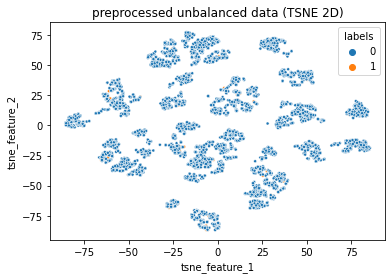

In [7]:
## unbalanced TSNE 2D plot:

plot1 = sns.scatterplot(data=dfUnbTsne2D, x="tsne_feature_1", y="tsne_feature_2", hue="labels",marker = '.')
plot1.set(title = "preprocessed unbalanced data (TSNE 2D)")

[Text(0.5, 1.0, 'balanced data (TSNE 2D)')]

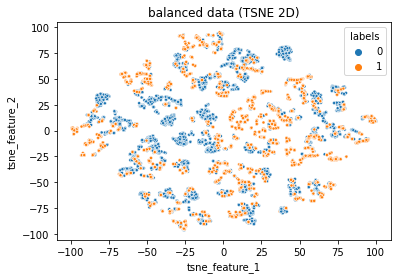

In [8]:
## balacned TSNE 2D plot:

plot2 = sns.scatterplot(data=dfBalTsne2D, x="tsne_feature_1", y="tsne_feature_2", hue="labels",marker = '.')
plot2.set(title = "balanced data (TSNE 2D)")

Text(0.5, 0, 'tsne_feature_3')

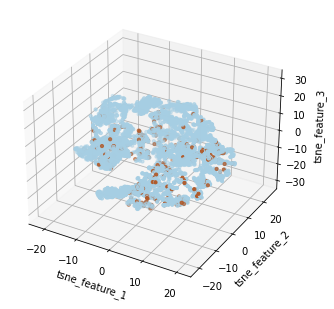

In [9]:
## unbalanced 3D plot (TSNE)

fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

sc = ax.scatter(unbTsne3D[:,0], unbTsne3D[:,1], unbTsne3D[:,2], s=40, c=processed.iloc[:,-1], marker='.', cmap='Paired')
ax.set_xlabel('tsne_feature_1')
ax.set_ylabel('tsne_feature_2')
ax.set_zlabel('tsne_feature_3')

In [10]:
## PCA to reduced dimension to either 2D or 3D

pca2D = PCA(n_components=2)
pca3D = PCA(n_components=3)

unbPca2D  = pca2D.fit_transform(processed)
unbPca3D  = pca3D.fit_transform(processed)

balPca2D  = pca2D.fit_transform(unbNorm)
balPca3D  = pca3D.fit_transform(balNorm)

dfUnbPca2D = pd.DataFrame(unbPca2D, columns=["PCA_feature_1", "PCA_feature_2"])
dfUnbPca2D["labels"] = processed.iloc[:,-1]

dfBalPca2D = pd.DataFrame(balPca2D, columns=["PCA_feature_1", "PCA_feature_2"])
dfBalPca2D["labels"] = balanced.iloc[:,-1]

dfUnbPca3D = pd.DataFrame(unbPca3D, columns=["PCA_feature_1", "PCA_feature_2", "PCA_feature_3"])
dfUnbPca3D["labels"] = processed.iloc[:,-1]

dfBalPca3D = pd.DataFrame(balPca3D, columns=["PCA_feature_1", "PCA_feature_2", "PCA_feature_3"])
dfBalPca3D["labels"] = balanced.iloc[:,-1]


print ("done !")

done !


[Text(0.5, 1.0, 'preprocessed unbalanced data (PCA 2D)')]

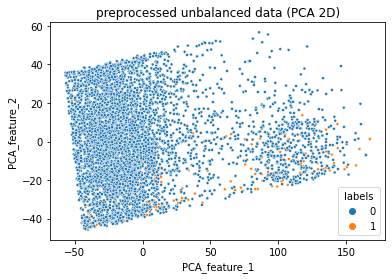

In [11]:
## unbalanced PCA 2D plot:

plot = sns.scatterplot(data=dfUnbPca2D, x="PCA_feature_1", y="PCA_feature_2", hue="labels",marker = '.')
plot.set(title = "preprocessed unbalanced data (PCA 2D)")

[Text(0.5, 1.0, 'balanced data (PCA 2D)')]

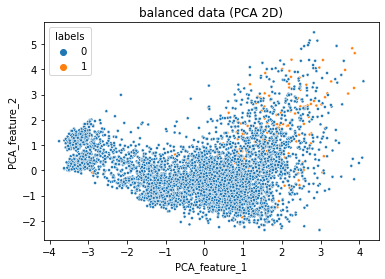

In [12]:
## balacned TSNE 2D plot:

plot = sns.scatterplot(data=dfBalPca2D, x="PCA_feature_1", y="PCA_feature_2", hue="labels",marker = '.')
plot.set(title = "balanced data (PCA 2D)")

Text(0.5, 0, 'PCA_feature_3')

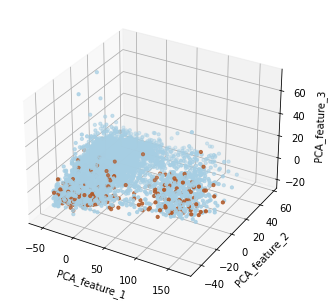

In [13]:
## unbalanced 3D plot (PCA)

fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

sc = ax.scatter(unbPca3D[:,0], unbPca3D[:,1], unbPca3D[:,2], s=40, c=processed.iloc[:,-1], marker='.', cmap='Paired')
ax.set_xlabel('PCA_feature_1')
ax.set_ylabel('PCA_feature_2')
ax.set_zlabel('PCA_feature_3')

Text(0.5, 0, 'PCA_feature_3')

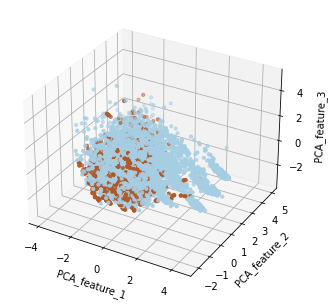

In [14]:
## balanced 3D plot (PCA)

fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

sc = ax.scatter(balPca3D[:,0], balPca3D[:,1], balPca3D[:,2], s=40, c=balanced.iloc[:,-1], marker='.', cmap='Paired')
ax.set_xlabel('PCA_feature_1')
ax.set_ylabel('PCA_feature_2')
ax.set_zlabel('PCA_feature_3')

In [15]:
## Here are a summary of all the preporcessed data:

print ("raw data:")
print (rawData)
print ("=================================================== \n")
print ("unbalanced data (with label encoder, fill in missing data, and droped patient id):")
print (processed)
print ("=================================================== \n")
print ("balanced data:")
print (balanced)
print ("=================================================== \n")
print ("2D TSNE unbalanced data:")
print (dfUnbTsne2D)
print ("=================================================== \n")
print ("3D TSNE unbalanced data:")
print (dfUnbTsne3D)
print ("=================================================== \n")
print ("2D TSNE balanced data:")
print (dfBalTsne2D)
print ("=================================================== \n")
print ("3D TSNE balanced data:")
print (dfBalTsne3D)
print ("=================================================== \n")
print ("2D PCA unbalanced data:")
print (dfUnbPca2D)
print ("=================================================== \n")
print ("3D PCA unbalanced data:")
print (dfUnbPca3D)
print ("=================================================== \n")
print ("2D PCA balanced data:")
print (dfBalPca2D)
print ("=================================================== \n")
print ("3D PCA balanced data:")
print (dfBalPca3D)
print ("=================================================== \n")

raw data:
         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36

In [16]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################

from __future__ import absolute_import
from __future__ import print_function
from __future__ import division

%matplotlib inline  

import sys
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from tqdm import tqdm


print('Version information')

print('python: {}'.format(sys.version))
print('matplotlib: {}'.format(matplotlib.__version__))
print('numpy: {}'.format(np.__version__))

# Set random seed so output is all same
np.random.seed(1)

Version information
python: 3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
matplotlib: 3.5.1
numpy: 1.21.5


In [17]:
class KMeans(object):
    
    def __init__(self): # no need to implement
        pass
    
    def pairwise_dist(self, x, y): # [5 pts]
        np.random.seed(1)
        """
        Args:
            x: N x D numpy array
            y: M x D numpy array
        Return:
                dist: N x M array, where dist2[i, j] is the euclidean distance between 
                x[i, :] and y[j, :]
                """
        M = x.shape[0]
        N = y.shape[0]
        x_dots = (x*x).sum(axis=1).reshape((M,1))*np.ones(shape=(1,N))
        y_dots = (y*y).sum(axis=1)*np.ones(shape=(M,1))
        D_squared =  x_dots + y_dots - 2*x.dot(y.T)
        return np.sqrt(D_squared)

    def _init_centers(self, points, K, **kwargs): # [3 pts]
        np.random.seed(1)
        """
        Args:
            points: NxD numpy array, where N is # points and D is the dimensionality
            K: number of clusters
            kwargs: any additional arguments you want
        Return:
            centers: K x D numpy array, the centers. 
        """
        
        idx = np.random.randint(points.shape[0], size=K)
        centers = points[idx, :]
        return centers

    def _update_assignment(self, centers, points): # [6 pts]
        np.random.seed(1)
        """
        Args:
            centers: KxD numpy array, where K is the number of clusters, and D is the dimension
            points: NxD numpy array, the observations
        Return:
            cluster_idx: numpy array of length N, the cluster assignment for each point
            
        Hint: You could call pairwise_dist() function.
        """
        cluster_idx = np.argmin(self.pairwise_dist(points, centers), axis=1)
        return np.transpose(cluster_idx)                       
        
   
    
    def _update_centers(self, old_centers, cluster_idx, points): # [8 pts]
        np.random.seed(1)
        """
        Args:
            old_centers: old centers KxD numpy array, where K is the number of clusters, and D is the dimension
            cluster_idx: numpy array of length N, the cluster assignment for each point
            points: NxD numpy array, the observations
        Return:
            centers: new centers, K x D numpy array, where K is the number of clusters, and D is the dimension.
        """
        k, d = old_centers.shape
        centers = np.empty((k, d))
        keep = []

        for i in range(k):
            cluster = points[np.argwhere(cluster_idx == i)]
            if cluster.shape[0] > 0:
                centers[i] = np.sum(cluster, axis=0) / cluster.shape[0]
                keep.append(centers[i])
        new_centers = np.array(keep)

        return new_centers
        


    def _get_loss(self, centers, cluster_idx, points): # [8 pts]
        np.random.seed(1)
        """
        Args:
            centers: KxD numpy array, where K is the number of clusters, and D is the dimension
            cluster_idx: numpy array of length N, the cluster assignment for each point
            points: NxD numpy array, the observations
        Return:
            loss: a single float number, which is the objective function of KMeans. 
        """
        #cluster_idx = self._update_assignment(centers, points)
        
        loss = (np.linalg.norm(points - centers[cluster_idx]) ** 2).sum()
        return loss

        
    def __call__(self, points, K, max_iters=100, abs_tol=1e-16, rel_tol=1e-16, verbose=False, **kwargs): # no need to implement
        """
        Args:
            points: NxD numpy array, where N is # points and D is the dimensionality
            K: number of clusters
            max_iters: maximum number of iterations (Hint: You could change it when debugging)
            abs_tol: convergence criteria w.r.t absolute change of loss
            rel_tol: convergence criteria w.r.t relative change of loss
            verbose: boolean to set whether method should print loss (Hint: helpful for debugging)
            kwargs: any additional arguments you want
        Return:
            cluster assignments: Nx1 int numpy array
            cluster centers: K x D numpy array, the centers
            loss: final loss value of the objective function of KMeans
        """
        centers = self._init_centers(points, K, **kwargs)
        for it in range(max_iters):
            cluster_idx = self._update_assignment(centers, points)
            centers = self._update_centers(centers, cluster_idx, points)
            loss = self._get_loss(centers, cluster_idx, points)
            K = centers.shape[0]
            if it:
                diff = np.abs(prev_loss - loss)
                if diff < abs_tol and diff / prev_loss < rel_tol:
                    break
            prev_loss = loss
            if verbose:
                print('iter %d, loss: %.4f' % (it, loss))
        return cluster_idx, centers, loss
    
    def find_optimal_num_clusters(self, data, max_K=15,iteration = 100): # [5 pts]
        np.random.seed(1)
        """Plots loss values for different number of clusters in K-Means
        
        Args:
            data: input data of shape(samples, 2)
            max_K: number of clusters
        Return:
            losses: a list, which includes the loss values for different number of clusters in K-Means
            Plot loss values against number of clusters
        """
      
        losses = np.empty((max_K))
        keep = []
        for K in range(1, max_K+1):
            
            result = self.__call__(data, K, max_iters=iteration)
            losses[K-1] = result [2]
            keep.append(losses[K-1])
       
        xd = list(range(1, max_K+1))
        yd = losses
        
        fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')
        ax.plot(xd, yd,**{'color': 'lightsteelblue', 'marker': 'o'});
        ax.set_xlabel('number_of_clusters')  
        ax.set_ylabel('loss_value')
        plt.show()
        
        return losses

unbalanced data (with label encoder, fill in missing data, and droped patient id):


C:\Users\lukez\AppData\Local\Temp\ipykernel_7236\2991242212.py:21: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(D_squared)


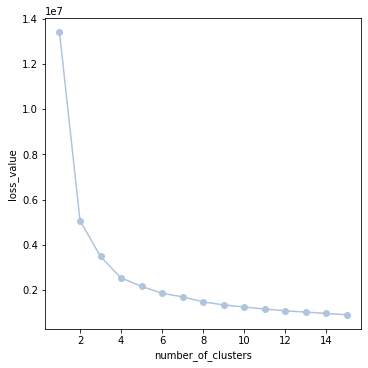


balanced data:


C:\Users\lukez\AppData\Local\Temp\ipykernel_7236\2991242212.py:21: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(D_squared)


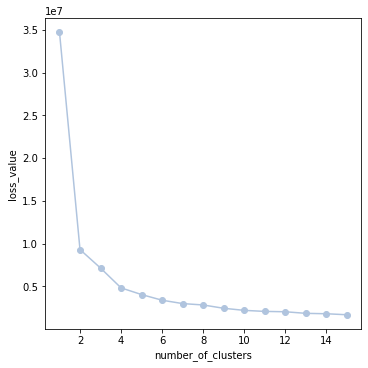


2D TSNE unbalanced data:


C:\Users\lukez\AppData\Local\Temp\ipykernel_7236\2991242212.py:21: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(D_squared)


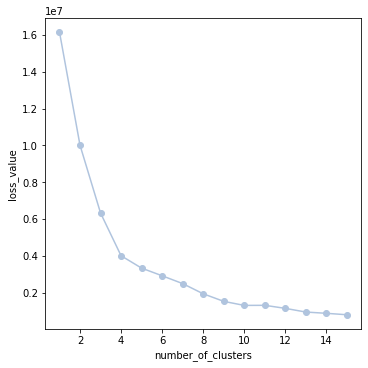


3D TSNE unbalanced data:


C:\Users\lukez\AppData\Local\Temp\ipykernel_7236\2991242212.py:21: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(D_squared)


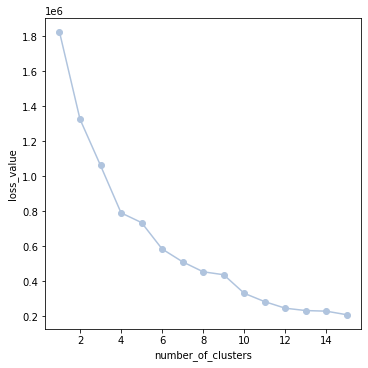


2D TSNE balanced data:


C:\Users\lukez\AppData\Local\Temp\ipykernel_7236\2991242212.py:21: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(D_squared)


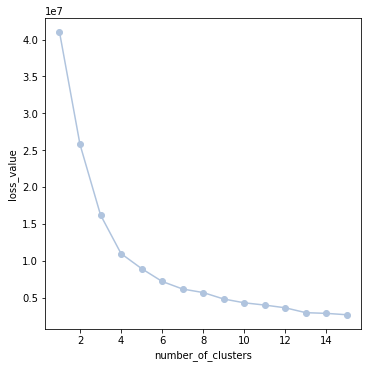


3D TSNE balanced data:


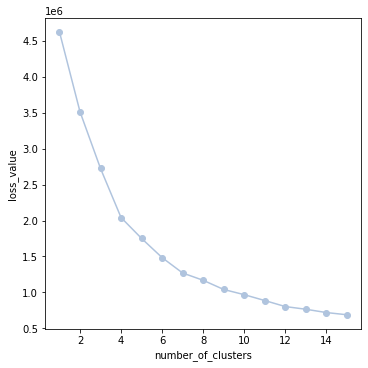


2D PCA unbalanced data:


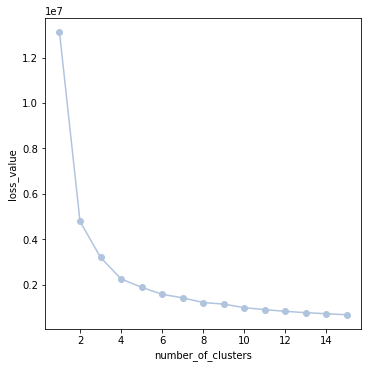


3D PCA unbalanced data:


C:\Users\lukez\AppData\Local\Temp\ipykernel_7236\2991242212.py:21: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(D_squared)


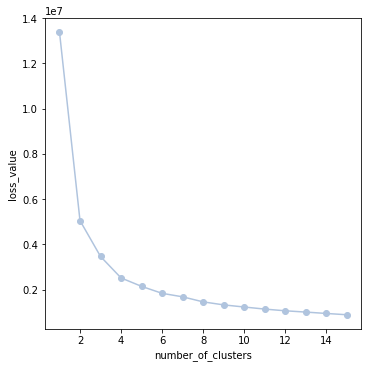


2D PCA balanced data:


C:\Users\lukez\AppData\Local\Temp\ipykernel_7236\2991242212.py:21: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(D_squared)


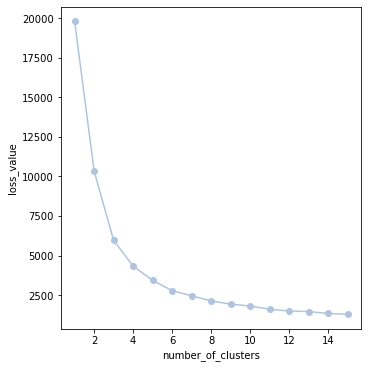


3D PCA balanced data:


C:\Users\lukez\AppData\Local\Temp\ipykernel_7236\2991242212.py:21: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(D_squared)


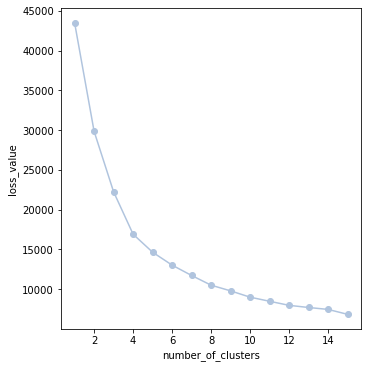

In [18]:
# Visualizing elbow method result
print ("unbalanced data (with label encoder, fill in missing data, and droped patient id):")
processed_np = processed.iloc[:,0:10].to_numpy()
KMeans().find_optimal_num_clusters(processed_np)
print ("=================================================== \n")
print ("balanced data:")
balanced_np = balanced.iloc[:,0:10].to_numpy()
KMeans().find_optimal_num_clusters(balanced_np)
print ("=================================================== \n")

print ("2D TSNE unbalanced data:")
dfUnbTsne2D_np = dfUnbTsne2D.iloc[:,0:2].to_numpy()
KMeans().find_optimal_num_clusters(dfUnbTsne2D_np)
print ("=================================================== \n")
print ("3D TSNE unbalanced data:")
dfUnbTsne3D_np = dfUnbTsne3D.iloc[:,0:3].to_numpy()
KMeans().find_optimal_num_clusters(dfUnbTsne3D_np)
print ("=================================================== \n")

print ("2D TSNE balanced data:")
dfBalTsne2D_np = dfBalTsne2D.iloc[:,0:2].to_numpy()
KMeans().find_optimal_num_clusters(dfBalTsne2D_np)
print ("=================================================== \n")
print ("3D TSNE balanced data:")
dfBalTsne3D_np = dfBalTsne3D.iloc[:,0:3].to_numpy()
KMeans().find_optimal_num_clusters(dfBalTsne3D_np)
print ("=================================================== \n")

print ("2D PCA unbalanced data:")
dfUnbPca2D_np = dfUnbPca2D.iloc[:,0:2].to_numpy()
KMeans().find_optimal_num_clusters(dfUnbPca2D_np)
print ("=================================================== \n")
print ("3D PCA unbalanced data:")
dfUnbPca3D_np = dfUnbPca3D.iloc[:,0:3].to_numpy()
KMeans().find_optimal_num_clusters(dfUnbPca3D_np)

print ("=================================================== \n")
print ("2D PCA balanced data:")
dfBalPca2D_np = dfBalPca2D.iloc[:,0:2].to_numpy()
KMeans().find_optimal_num_clusters(dfBalPca2D_np)
print ("=================================================== \n")
print ("3D PCA balanced data:")
dfBalPca3D_np = dfBalPca3D.iloc[:,0:3].to_numpy()
KMeans().find_optimal_num_clusters(dfBalPca3D_np)
print ("=================================================== \n")

In [19]:
optimal_clusters_unbalanced = 5
optimal_clusters_balanced = 5

optimal_clusters_dfUnbTsne2D = 5
optimal_clusters_dfBalTsne2D = 5

optimal_clusters_dfUnbTsne3D = 7
optimal_clusters_dfBalTsne3D = 7

optimal_clusters_dfUnbPca2D = 5
optimal_clusters_dfBalPca2D = 5

optimal_clusters_dfUnbPca3D = 5
optimal_clusters_dfBalPca3D = 7

In [20]:
def plot_2Ddata(data, plot_name):
    
    # Visualize the dataset
    
    data0 = data[data[:, 2] == 0][:, :2]
    data1 = data[data[:, 2] == 1][:, :2]
    data2 = data[data[:, 2] == 2][:, :2]
    data3 = data[data[:, 2] == 3][:, :2]
    data4 = data[data[:, 2] == 4][:, :2]
    
    plt.scatter(data0[:, 0], data0[:, 1], c='lightcoral', label="Cluster 1")
    plt.scatter(data1[:, 0], data1[:, 1], c='darkkhaki', label="Cluster 2")
    plt.scatter(data2[:, 0], data2[:, 1], c='darkseagreen', label="Cluster 3")
    plt.scatter(data3[:, 0], data3[:, 1], c='orchid', label="Cluster 4")
    plt.scatter(data4[:, 0], data4[:, 1], c='yellow', label="Cluster 5")

    plt.legend()
    plt.title(plot_name)
    plt.show()
    plt.clf()

In [21]:
def plot_2Ddata7(data, plot_name):
    
    # Visualize the dataset
    
    data0 = data[data[:, 2] == 0][:, :2]
    data1 = data[data[:, 2] == 1][:, :2]
    data2 = data[data[:, 2] == 2][:, :2]
    data3 = data[data[:, 2] == 3][:, :2]
    data4 = data[data[:, 2] == 4][:, :2]
    data5 = data[data[:, 2] == 5][:, :2]
    data6 = data[data[:, 2] == 6][:, :2]
    
    plt.scatter(data0[:, 0], data0[:, 1], c='lightcoral', label="Cluster 1")
    plt.scatter(data1[:, 0], data1[:, 1], c='darkkhaki', label="Cluster 2")
    plt.scatter(data2[:, 0], data2[:, 1], c='darkseagreen', label="Cluster 3")
    plt.scatter(data3[:, 0], data3[:, 1], c='orchid', label="Cluster 4")
    plt.scatter(data4[:, 0], data4[:, 1], c='yellow', label="Cluster 5")
    plt.scatter(data5[:, 0], data5[:, 1], c='blue', label="Cluster 6")
    plt.scatter(data6[:, 0], data6[:, 1], c='orange', label="Cluster 7")          
    

    plt.legend()
    plt.title(plot_name)
    plt.show()
    plt.clf()

In [22]:
def plot_3Ddata(data,plot_name):
    
    data0 = data[data[:, 3] == 0][:, :3]
    data1 = data[data[:, 3] == 1][:, :3]
    data2 = data[data[:, 3] == 2][:, :3]
    data3 = data[data[:, 3] == 3][:, :3]
    data4 = data[data[:, 3] == 4][:, :3]
    
    fig = plt.figure(figsize = (10, 7))
    ax = plt.axes(projection ="3d")
    
    ax.scatter3D(data0[:, 0], data0[:, 1],data0[:, 2], c='lightcoral', label="Cluster 1")
    ax.scatter3D(data1[:, 0], data1[:, 1],data1[:, 2], c='darkkhaki', label="Cluster 2")
    ax.scatter3D(data2[:, 0], data2[:, 1],data2[:, 2], c='darkseagreen', label="Cluster 3")
    ax.scatter3D(data3[:, 0], data3[:, 1],data3[:, 2], c='orchid', label="Cluster 4")
    ax.scatter3D(data4[:, 0], data4[:, 1],data4[:, 2], c='yellow', label="Cluster 5")
    
    plt.legend()
    plt.title(plot_name)
    plt.show()
    plt.clf()

In [23]:
def plot_3Ddata7(data,plot_name):
    
    data0 = data[data[:, 3] == 0][:, :3]
    data1 = data[data[:, 3] == 1][:, :3]
    data2 = data[data[:, 3] == 2][:, :3]
    data3 = data[data[:, 3] == 3][:, :3]
    data4 = data[data[:, 3] == 4][:, :3]
    data5 = data[data[:, 3] == 5][:, :3]
    data6 = data[data[:, 3] == 6][:, :3]
    
    fig = plt.figure(figsize = (10, 7))
    ax = plt.axes(projection ="3d")
    
    ax.scatter3D(data0[:, 0], data0[:, 1],data0[:, 2], c='lightcoral', label="Cluster 1")
    ax.scatter3D(data1[:, 0], data1[:, 1],data1[:, 2], c='darkkhaki', label="Cluster 2")
    ax.scatter3D(data2[:, 0], data2[:, 1],data2[:, 2], c='darkseagreen', label="Cluster 3")
    ax.scatter3D(data3[:, 0], data3[:, 1],data3[:, 2], c='orchid', label="Cluster 4")
    ax.scatter3D(data4[:, 0], data4[:, 1],data4[:, 2], c='yellow', label="Cluster 5")
    ax.scatter3D(data5[:, 0], data5[:, 1],data5[:, 2], c='blue', label="Cluster 6")
    ax.scatter3D(data6[:, 0], data6[:, 1],data6[:, 2], c='orange', label="Cluster 7")
    
    plt.legend()
    plt.title(plot_name)
    plt.show()
    plt.clf()

In [50]:
# Unbalanced data K.means, but can't visualize, 10 dimensions
cluster_idx_unbalanced, centers_unbalanced, loss_unbalanced = KMeans()(processed_np, optimal_clusters_unbalanced, max_iters = 10)
cluster_idx_unbalanced = cluster_idx_unbalanced.reshape((5110,1))
# print("unbalanced data cluster_idx:",cluster_idx_unbalanced)
# print("unbalanced data centers:",centers_unbalanced)
# print("unbalanced data loss:",loss_unbalanced)
np.savetxt("unBalancedKmean.csv", cluster_idx_unbalanced, delimiter=",")
processed.to_csv('processed.csv',index = False)
dfUnbTsne2D['index'] = cluster_idx_unbalanced
dfUnbTsne2D.to_csv('UnbTsne2D.csv',index = False)
dfUnbTsne3D.to_csv('UnbTsne3D.csv',index = False)


# Balanced data K.means, but can't visualize, 10 dimensions
cluster_idx_balanced, centers_balanced, loss_balanced = KMeans()(balanced_np, optimal_clusters_balanced, max_iters = 10)
cluster_idx_balanced = cluster_idx_balanced.reshape((9722,1))
balanced['idx'] = cluster_idx_balanced
print(balanced.head())

balanced.to_csv('balanced.csv',index = False)

# print("balanced data cluster_idx:",cluster_idx_balanced)
# print("balanced data centers:",centers_balanced)
# print("balanced data loss:",loss_balanced)

   gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          2   
1       0  61.0             0              0             1          3   
2       1  80.0             0              1             1          2   
3       0  49.0             0              0             1          2   
4       0  79.0             1              0             1          3   

   Residence_type  avg_glucose_level        bmi  smoking_status  stroke  idx  
0               1             228.69  36.600000               1       1    3  
1               0             202.21  28.893237               2       1    0  
2               0             105.92  32.500000               2       1    4  
3               1             171.23  34.400000               3       1    1  
4               0             174.12  24.000000               2       1    0  


C:\Users\lukez\AppData\Local\Temp\ipykernel_7236\2991242212.py:21: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(D_squared)


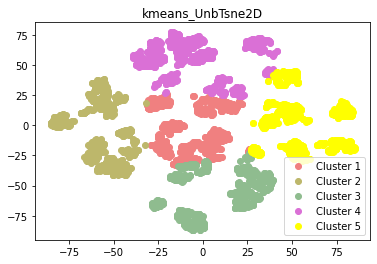

C:\Users\lukez\AppData\Local\Temp\ipykernel_7236\2991242212.py:21: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(D_squared)


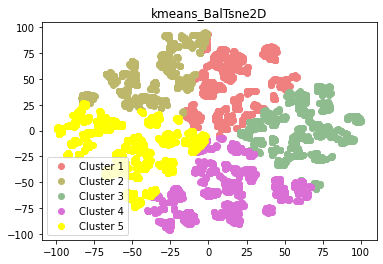

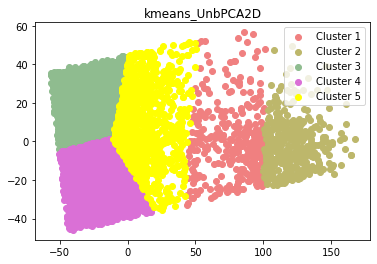

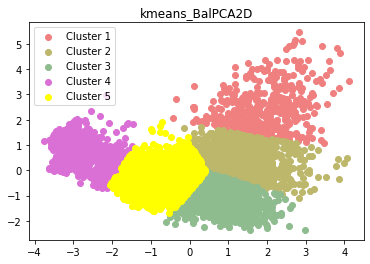

<Figure size 432x288 with 0 Axes>

In [26]:
# Unbalanced 2DTSNE data K.means
cluster_idx_dfUnbTsne2D, centers_dfUnbTsne2D, loss_dfUnbTsne2D = KMeans()(dfUnbTsne2D_np, 5, max_iters = 10)
cluster_idx_dfUnbTsne2D = cluster_idx_dfUnbTsne2D.reshape((5110,1))
data_kmeans_UnbTsne2D = np.concatenate((dfUnbTsne2D_np, cluster_idx_dfUnbTsne2D), axis=1)
plot_2Ddata(data_kmeans_UnbTsne2D, 'kmeans_UnbTsne2D')
# Balanced 2DTSNE data K.means
cluster_idx_dfBalTsne2D, centers_dfBalTsne2D, loss_dfBalTsne2D = KMeans()(dfBalTsne2D_np, 5, max_iters = 10)
cluster_idx_dfBalTsne2D = cluster_idx_dfBalTsne2D.reshape((9722,1))
data_kmeans_BalTsne2D = np.concatenate((dfBalTsne2D_np, cluster_idx_dfBalTsne2D), axis=1)
plot_2Ddata(data_kmeans_BalTsne2D, 'kmeans_BalTsne2D')


# Unbalanced 2DPCA data K.means
cluster_idx_dfUnbPca2D, centers_dfUnbPca2D, loss_dfUnbPca2D = KMeans()(dfUnbPca2D_np, 5, max_iters = 10)
cluster_idx_dfUnbPca2D = cluster_idx_dfUnbPca2D.reshape((5110,1))
data_kmeans_UnbPca2D = np.concatenate((dfUnbPca2D_np, cluster_idx_dfUnbPca2D), axis=1)
plot_2Ddata(data_kmeans_UnbPca2D, 'kmeans_UnbPCA2D')
# Balanced 2DPCA data K.means
cluster_idx_dfBalPca2D, centers_dfBalPca2D, loss_dfBalPca2D = KMeans()(dfBalPca2D_np, 5, max_iters = 10)
cluster_idx_dfBalPca2D = cluster_idx_dfBalPca2D.reshape((5110,1))
data_kmeans_BalPca2D = np.concatenate((dfBalPca2D_np, cluster_idx_dfBalPca2D), axis=1)
plot_2Ddata(data_kmeans_BalPca2D, 'kmeans_BalPCA2D')

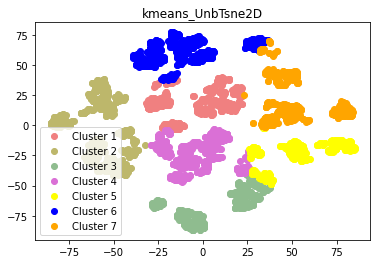

C:\Users\lukez\AppData\Local\Temp\ipykernel_7236\2991242212.py:21: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(D_squared)


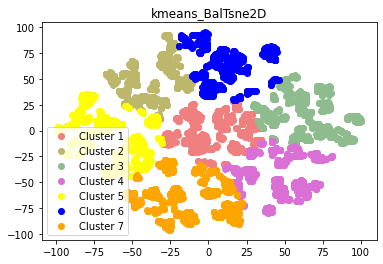

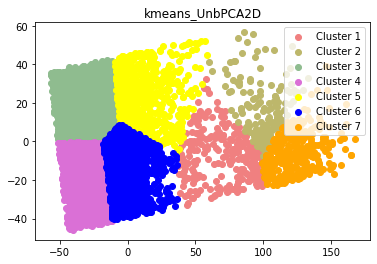

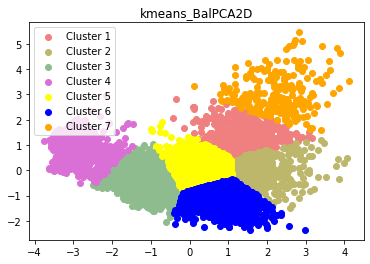

<Figure size 432x288 with 0 Axes>

In [27]:
# Unbalanced 2DTSNE data K.means
cluster_idx_dfUnbTsne2D, centers_dfUnbTsne2D, loss_dfUnbTsne2D = KMeans()(dfUnbTsne2D_np, 7, max_iters = 10)
cluster_idx_dfUnbTsne2D = cluster_idx_dfUnbTsne2D.reshape((5110,1))
data_kmeans_UnbTsne2D = np.concatenate((dfUnbTsne2D_np, cluster_idx_dfUnbTsne2D), axis=1)
plot_2Ddata7(data_kmeans_UnbTsne2D, 'kmeans_UnbTsne2D')
# Balanced 2DTSNE data K.means
cluster_idx_dfBalTsne2D, centers_dfBalTsne2D, loss_dfBalTsne2D = KMeans()(dfBalTsne2D_np, 7, max_iters = 10)
cluster_idx_dfBalTsne2D = cluster_idx_dfBalTsne2D.reshape((9722,1))
data_kmeans_BalTsne2D = np.concatenate((dfBalTsne2D_np, cluster_idx_dfBalTsne2D), axis=1)
plot_2Ddata7(data_kmeans_BalTsne2D, 'kmeans_BalTsne2D')


# Unbalanced 2DPCA data K.means
cluster_idx_dfUnbPca2D, centers_dfUnbPca2D, loss_dfUnbPca2D = KMeans()(dfUnbPca2D_np, 7, max_iters = 10)
cluster_idx_dfUnbPca2D = cluster_idx_dfUnbPca2D.reshape((5110,1))
data_kmeans_UnbPca2D = np.concatenate((dfUnbPca2D_np, cluster_idx_dfUnbPca2D), axis=1)
plot_2Ddata7(data_kmeans_UnbPca2D, 'kmeans_UnbPCA2D')
# Balanced 2DPCA data K.means
cluster_idx_dfBalPca2D, centers_dfBalPca2D, loss_dfBalPca2D = KMeans()(dfBalPca2D_np, 7, max_iters = 10)
cluster_idx_dfBalPca2D = cluster_idx_dfBalPca2D.reshape((5110,1))
data_kmeans_BalPca2D = np.concatenate((dfBalPca2D_np, cluster_idx_dfBalPca2D), axis=1)
plot_2Ddata7(data_kmeans_BalPca2D, 'kmeans_BalPCA2D')

C:\Users\lukez\AppData\Local\Temp\ipykernel_7236\2991242212.py:21: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(D_squared)


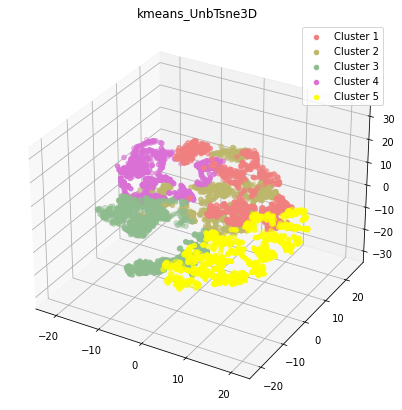

<Figure size 432x288 with 0 Axes>

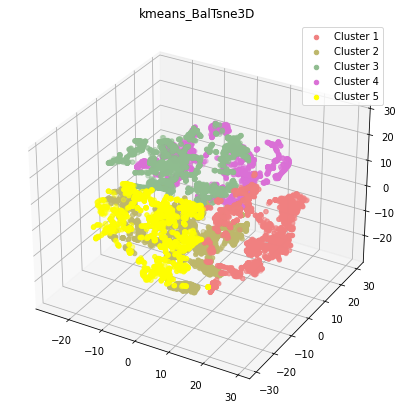

<Figure size 432x288 with 0 Axes>

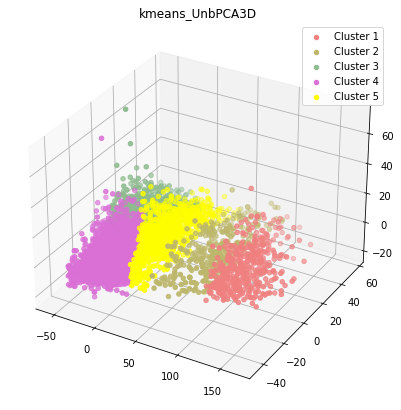

<Figure size 432x288 with 0 Axes>

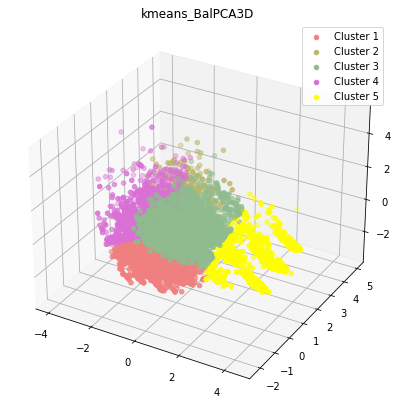

<Figure size 432x288 with 0 Axes>

In [28]:
# Unbalanced 3DTSNE data K.means
cluster_idx_dfUnbTsne3D, centers_dfUnbTsne3D, loss_dfUnbTsne3D = KMeans()(dfUnbTsne3D_np, 5, max_iters = 10)
cluster_idx_dfUnbTsne3D = cluster_idx_dfUnbTsne3D.reshape((5110,1))
data_kmeans_UnbTsne3D = np.concatenate((dfUnbTsne3D_np, cluster_idx_dfUnbTsne3D), axis=1)
plot_3Ddata(data_kmeans_UnbTsne3D, 'kmeans_UnbTsne3D')
# Balanced 3DTSNE data K.means
cluster_idx_dfBalTsne3D, centers_dfBalTsne3D, loss_dfBalTsne3D = KMeans()(dfBalTsne3D_np, 5, max_iters = 10)
cluster_idx_dfBalTsne3D = cluster_idx_dfBalTsne3D.reshape((9722,1))
data_kmeans_BalTsne3D = np.concatenate((dfBalTsne3D_np, cluster_idx_dfBalTsne3D), axis=1)
plot_3Ddata(data_kmeans_BalTsne3D, 'kmeans_BalTsne3D')


# Unbalanced 3DPCA data K.means
cluster_idx_dfUnbPca3D, centers_dfUnbPca3D, loss_dfUnbPca3D = KMeans()(dfUnbPca3D_np, 5, max_iters = 10)
cluster_idx_dfUnbPca3D = cluster_idx_dfUnbPca3D.reshape((5110,1))
data_kmeans_UnbPca3D = np.concatenate((dfUnbPca3D_np, cluster_idx_dfUnbPca3D), axis=1)
plot_3Ddata(data_kmeans_UnbPca3D, 'kmeans_UnbPCA3D')
# Balanced 3DPCA data K.means
cluster_idx_dfBalPca3D, centers_dfBalPca3D, loss_dfBalPca3D = KMeans()(dfBalPca3D_np, 5, max_iters = 10)
cluster_idx_dfBalPca3D = cluster_idx_dfBalPca3D.reshape((9722,1))
data_kmeans_BalPca3D = np.concatenate((dfBalPca3D_np, cluster_idx_dfBalPca3D), axis=1)
plot_3Ddata(data_kmeans_BalPca3D, 'kmeans_BalPCA3D')

C:\Users\lukez\AppData\Local\Temp\ipykernel_7236\2991242212.py:21: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(D_squared)


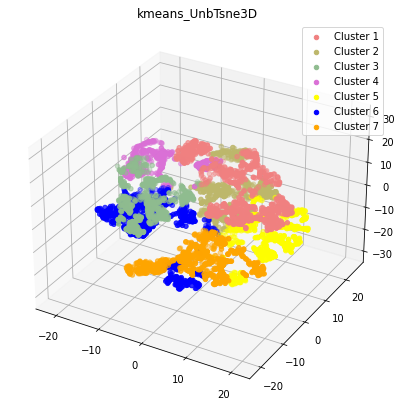

<Figure size 432x288 with 0 Axes>

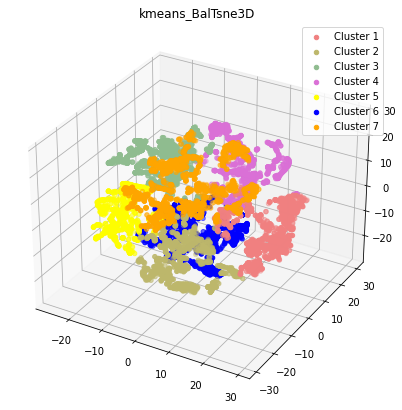

<Figure size 432x288 with 0 Axes>

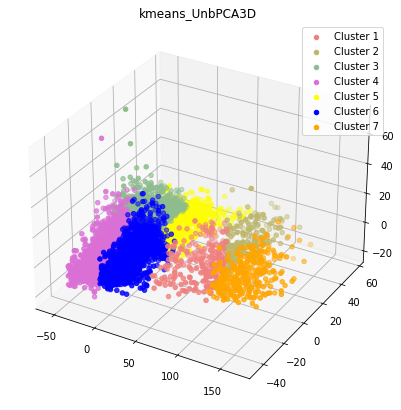

<Figure size 432x288 with 0 Axes>

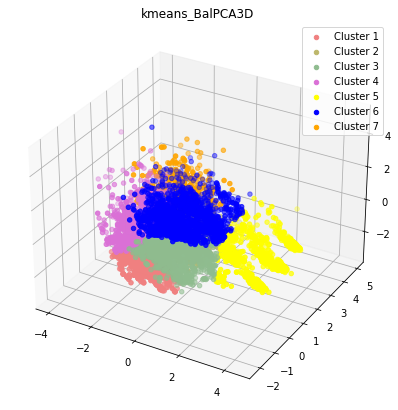

<Figure size 432x288 with 0 Axes>

In [29]:
# Unbalanced 3DTSNE data K.means
cluster_idx_dfUnbTsne3D, centers_dfUnbTsne3D, loss_dfUnbTsne3D = KMeans()(dfUnbTsne3D_np, 7, max_iters = 10)
cluster_idx_dfUnbTsne3D = cluster_idx_dfUnbTsne3D.reshape((5110,1))
data_kmeans_UnbTsne3D = np.concatenate((dfUnbTsne3D_np, cluster_idx_dfUnbTsne3D), axis=1)
plot_3Ddata7(data_kmeans_UnbTsne3D, 'kmeans_UnbTsne3D')
# Balanced 3DTSNE data K.means
cluster_idx_dfBalTsne3D, centers_dfBalTsne3D, loss_dfBalTsne3D = KMeans()(dfBalTsne3D_np, 7, max_iters = 10)
cluster_idx_dfBalTsne3D = cluster_idx_dfBalTsne3D.reshape((9722,1))
data_kmeans_BalTsne3D = np.concatenate((dfBalTsne3D_np, cluster_idx_dfBalTsne3D), axis=1)
plot_3Ddata7(data_kmeans_BalTsne3D, 'kmeans_BalTsne3D')


# Unbalanced 3DPCA data K.means
cluster_idx_dfUnbPca3D, centers_dfUnbPca3D, loss_dfUnbPca3D = KMeans()(dfUnbPca3D_np, 7, max_iters = 10)
cluster_idx_dfUnbPca3D = cluster_idx_dfUnbPca3D.reshape((5110,1))
data_kmeans_UnbPca3D = np.concatenate((dfUnbPca3D_np, cluster_idx_dfUnbPca3D), axis=1)
plot_3Ddata7(data_kmeans_UnbPca3D, 'kmeans_UnbPCA3D')
# Balanced 3DPCA data K.means
cluster_idx_dfBalPca3D, centers_dfBalPca3D, loss_dfBalPca3D = KMeans()(dfBalPca3D_np, 7, max_iters = 10)
cluster_idx_dfBalPca3D = cluster_idx_dfBalPca3D.reshape((9722,1))
data_kmeans_BalPca3D = np.concatenate((dfBalPca3D_np, cluster_idx_dfBalPca3D), axis=1)
plot_3Ddata7(data_kmeans_BalPca3D, 'kmeans_BalPCA3D')